In [1]:
# importing modules
import os
import sys
sys.path.append("..")
import pandas as pd
import matplotlib.pyplot as plt
from src.pipeline import TweetProcessor
from src.data_handler import DataHandler


In [2]:
# please provide your database URL
os.environ["REDSHIFT_URI"]="Declare your database here"

In [ ]:
# downloading training data
training_data_fetcher=DataHandler(training_data=True)
df_tr=training_data_fetcher.download_data()
df_tr.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
# downloading testing data
testing_data_fetcher=DataHandler(training_data=False)
df_ts=testing_data_fetcher.download_data()
df_ts.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


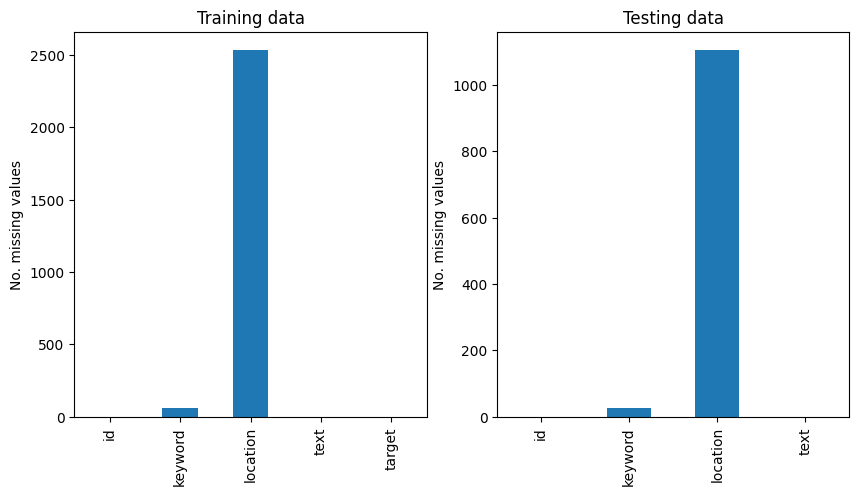

In [5]:
# checking missing values
tr_null=df_tr.isnull().sum()
ts_null=df_ts.isnull().sum()

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(10,5))
tr_null.plot(ax=ax[0], kind="bar")
ax[0].set_title("Training data")
ax[0].set_ylabel("No. missing values")
ts_null.plot(ax=ax[1], kind="bar")
ax[1].set_title("Testing data")
ax[1].set_ylabel("No. missing values")
plt.show()

In [6]:
# Launch processing pipeline for training data
Processor_tr=TweetProcessor(df_tr)
df_tr_clean=Processor_tr.process()

df_tr_clean.head()

,id,keyword,location,text,target
0,1,,,deed reason earthquake alla forgive,1
1,4,,,forest fire near la range task canada,1
2,5,,,resident ask shelter place notify officer evac...,1
3,6,,,13000 people receive wildfire evacuation order...,1
4,7,,,send photo ruby alaska smoke wildfire pour school,1


In [7]:
# Launch processing pipeline for testing data
Processor_ts=TweetProcessor(df_ts)
df_ts_clean=Processor_ts.process()

In [ ]:
# Upload processed data to redshift
training_data_fetcher.upload_data(df_tr_clean)